In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/alvaroromangomez/Documents/Documentos personales/Formación/Master Bioinformática y Estadística/TFM/tfm_alvaro/Codigo/notebooks':
  os.chdir(r'/Users/alvaroromangomez/Documents/Documentos personales/Formación/Master Bioinformática y Estadística/TFM/tfm_alvaro/Codigo/notebooks')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/3s/vv1d0lmn7g134m4psncn2_q80000gn/T/ipykernel_10486/1603051704.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Users/alvaroromangomez/.pyenv/versions/3.10.10/lib/python3.10/importlib/_bootstrap.py": 1680292077.4164195, "/Users/alvaroromangomez/.pyenv/versions/3.10.10/lib/python3.10/importlib/_bootstrap_external.py": 1680292077.4196162, "/Users/alvaroromangomez/.pyenv/versions/3.10.10/lib/python3.10/codecs.py": 1680292075.8375273, "/Users/alvaroromangomez/.pyenv/versions/3.10.10/lib/python3.10/encodings/aliases.py": 1680292076.6626852, "/Users/alvaroromangomez/.pyenv/versions/3.10.10/lib/python3.10/encodings/__init__.py": 1680292076.6596105, "/Users/alvaroromangomez/.pyenv/versions/3.10.10/lib/python3.10/encodings/utf_8.py": 1680292077.0363183, "/Users/alvaroromangomez/.pyenv/versions/3.10.10/lib/python3.10/abc.py": 1680292075.7900312, "/Users/alvaroromangomez/.pyenv/versions/3.10.10/lib/python3.10/io.py": 1680292075.9434319, "/Users/alvaroromangomez/.pyenv/versions/3.10.10/lib/python3.10/stat.py": 1680292076.0992587, "/Users/alvaroromangomez/.pyenv/versions/3.10.10/lib/python3.10/_collection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import sklearn.decomposition as skd
import sklearn.manifold as skm

# IMPORT CUSTOM MODULES
import sys

sys.path.append("../src")
import utils.molUtils as molUtils
from utils.molUtils import calculate_qed_properties

In [3]:
# DIRECTORIES
input_path = "../data/processed/"
figure_path = "../../Memoria/figures/"
# FILES
smiles_file = "smiles_activity.csv"
molecular_descriptors_file = "CHEMBL4523954_descriptors.csv"

In [4]:
# LOAD DATA
smiles = pd.read_csv(input_path + smiles_file)
molecular_descriptors = pd.read_csv(input_path + molecular_descriptors_file)

In [5]:
# CALCULATE QED
molecules_qed = molUtils.calculate_molecule_set(
    smiles, "canonical_smiles", calculate_qed_properties
)

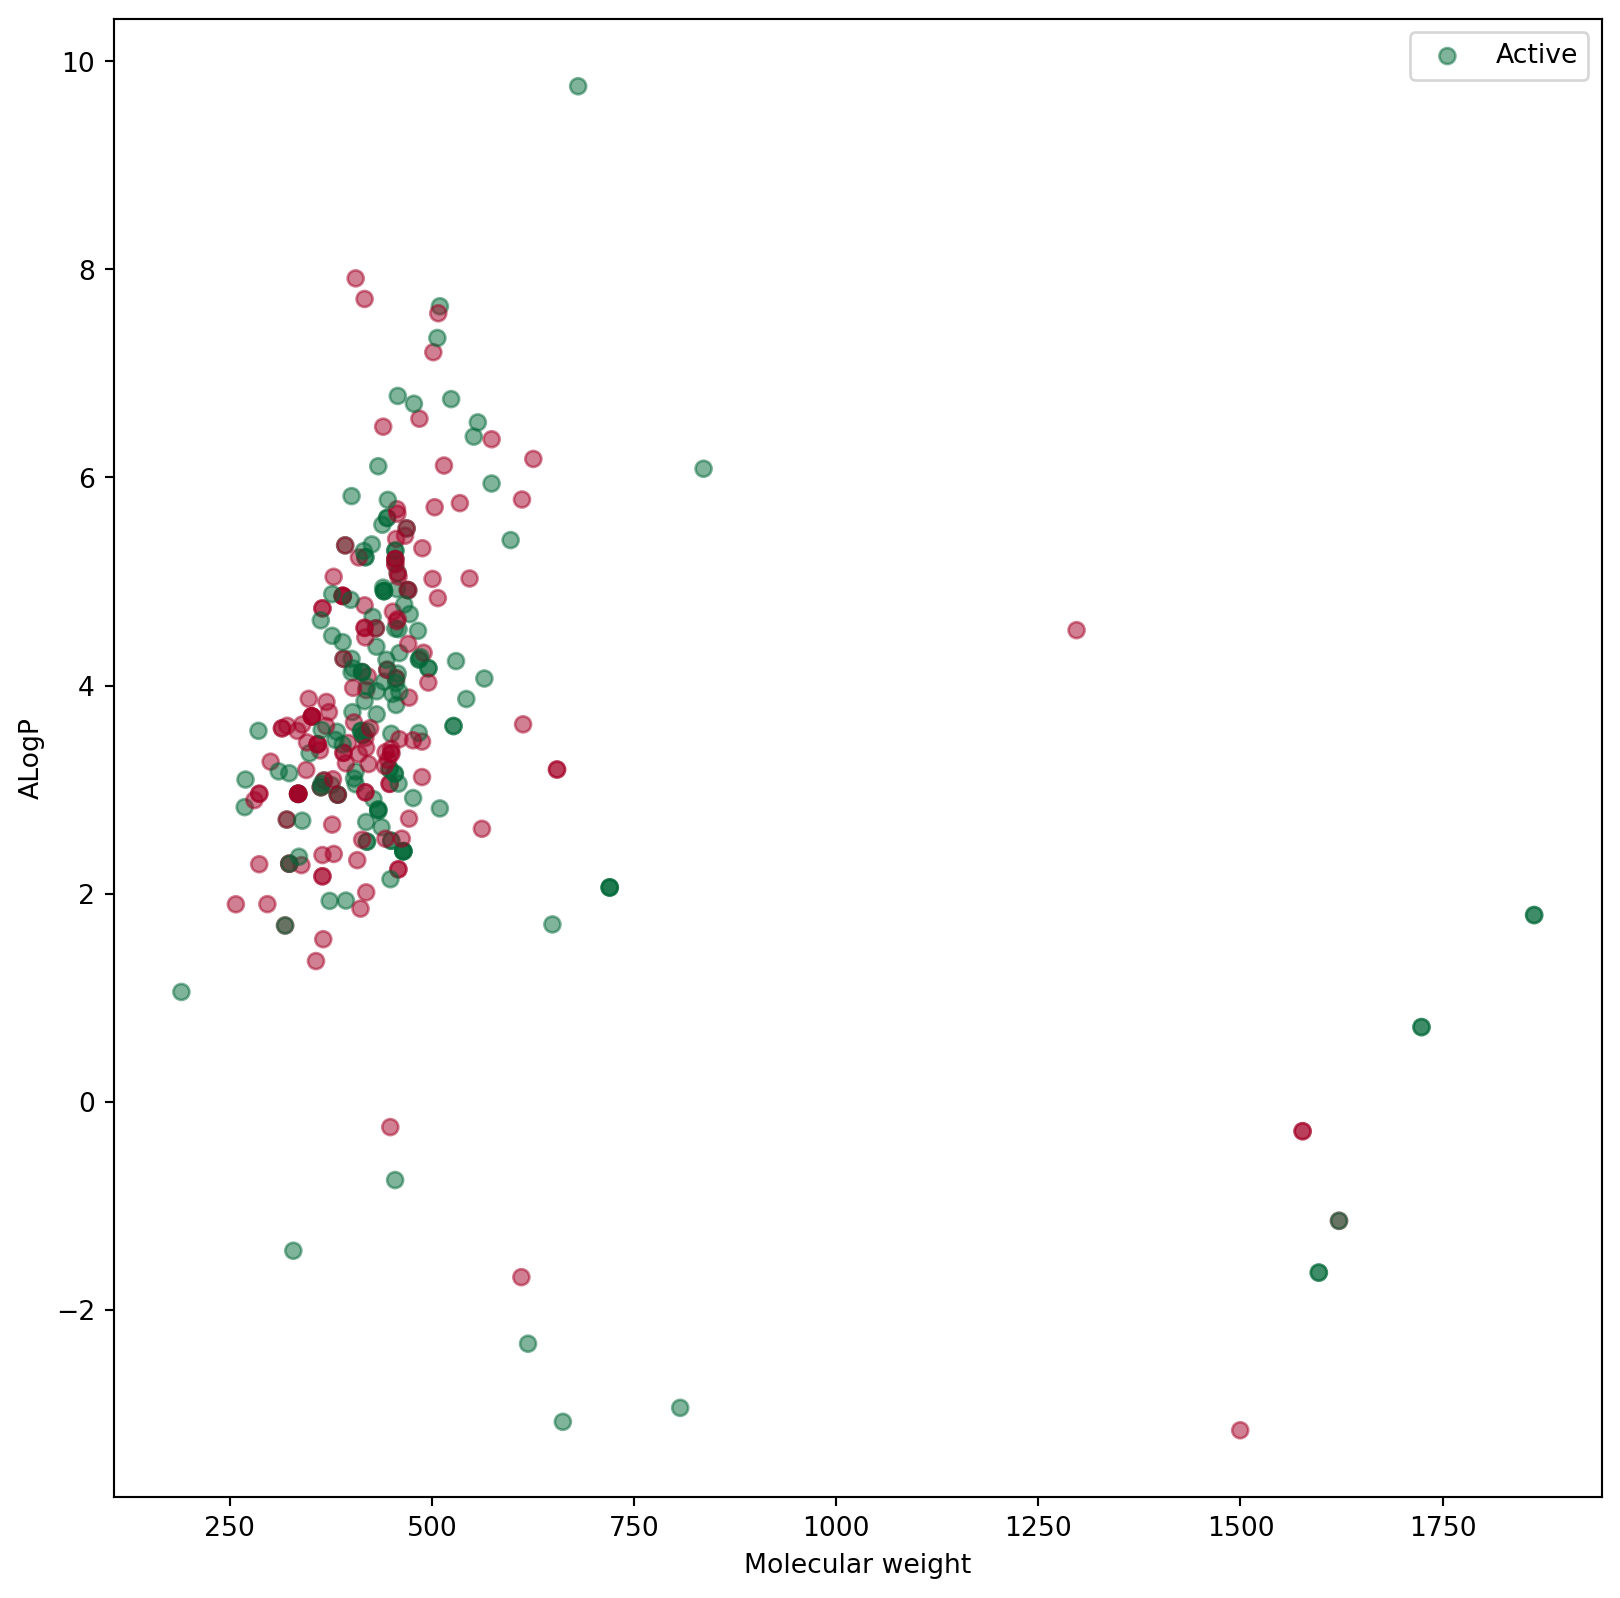

In [6]:
# REPRESENT MOLECULES WITH X = MOLECULAR WEIGHT AND Y = ALOGP WITH COLOR DEPENDING ON ACTIVITY GREEN FOR ACTIVE AND RED FOR INACTIVE AND LEGEND FOR EACH COLOR
plt.figure(figsize=(10, 10))
plt.scatter(
    molecules_qed["MW"],
    molecules_qed["ALOGP"],
    c=molecules_qed["activity"],
    cmap="RdYlGn",
    alpha=0.5,
)
plt.xlabel("Molecular weight")
plt.ylabel("ALogP")
plt.legend(["Active", "Inactive"])
plt.savefig(figure_path + "chemical_space.png")
plt.show()

In [7]:
# CALCULATE PCA FOR MOLECULAR DESCRIPTORS
pca = skd.PCA(n_components=3)
pca.fit(molecular_descriptors.drop(["activity"], axis=1))
molecular_descriptors_pca = pd.DataFrame(
    pca.transform(molecular_descriptors.drop(["activity"], axis=1))
)

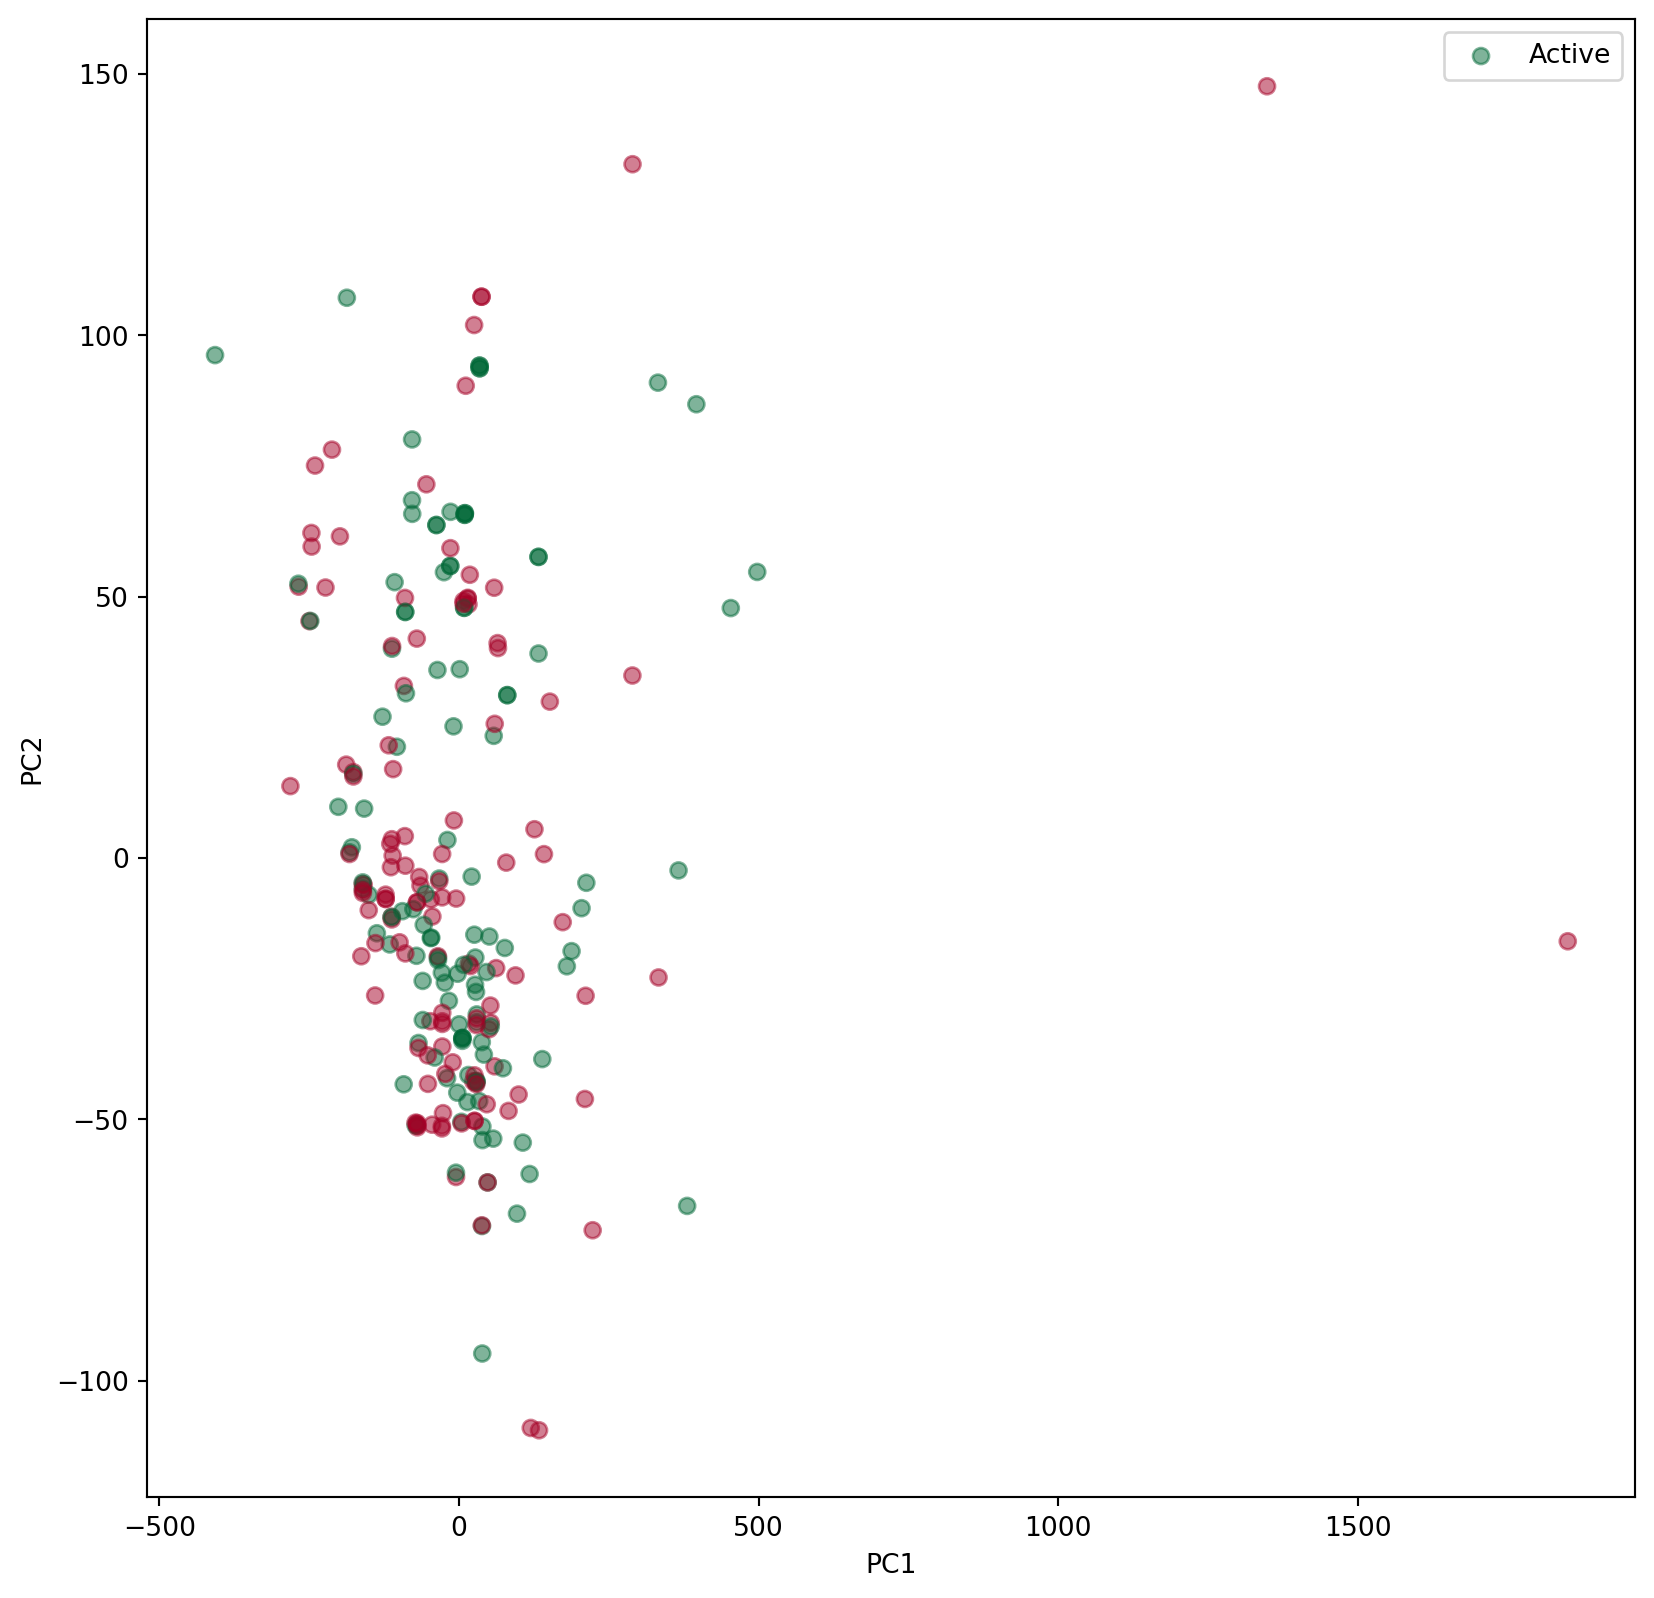

In [8]:
# REPRESENTATION OF 2D PCA
plt.figure(figsize=(10, 10))
plt.scatter(
    molecular_descriptors_pca[0],
    molecular_descriptors_pca[1],
    c=molecular_descriptors["activity"],
    cmap="RdYlGn",
    alpha=0.5,
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(["Active", "Inactive"])
plt.savefig(figure_path + "pca2D.png")
plt.show()

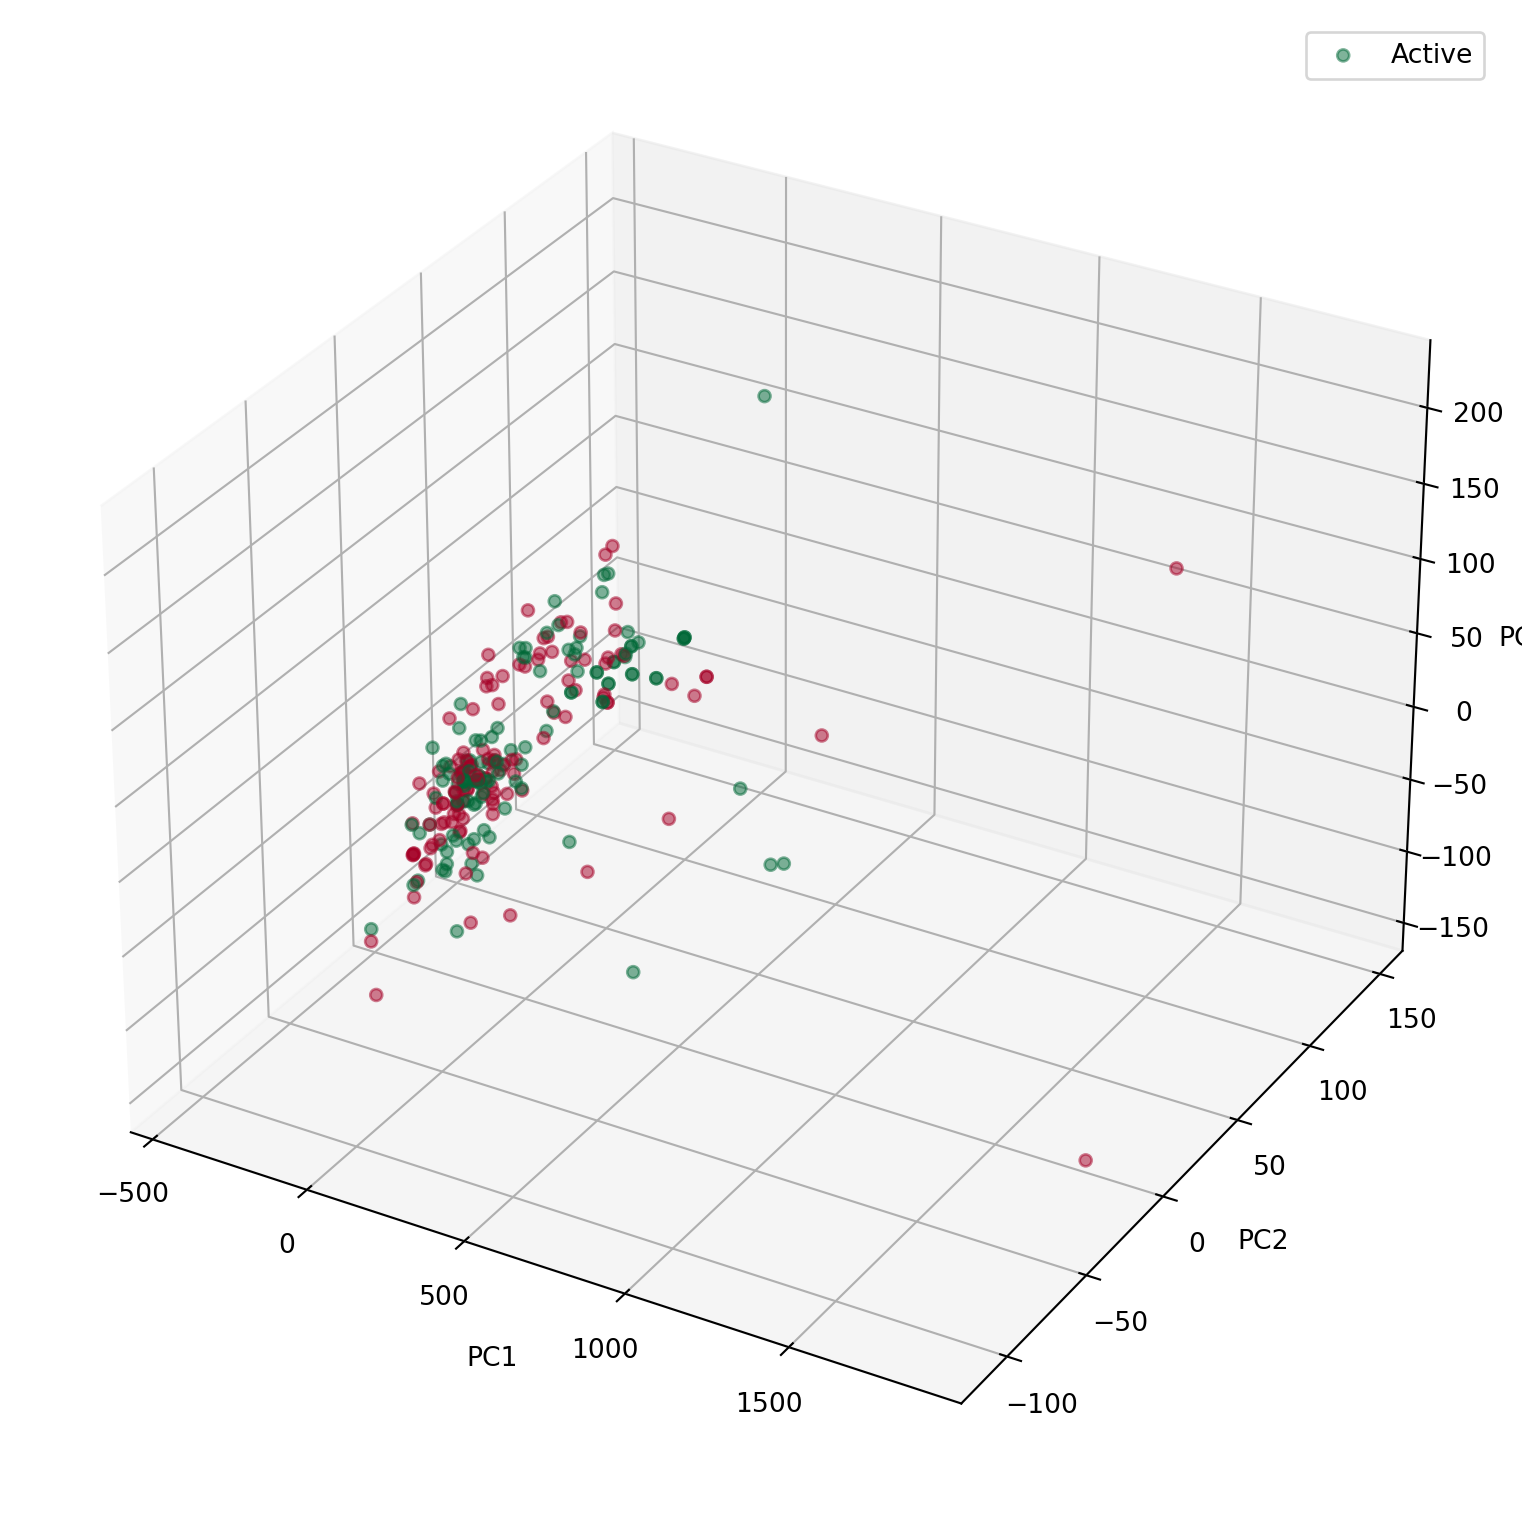

In [9]:
# REPRESENTATION OF 3D PCA
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    molecular_descriptors_pca[0],
    molecular_descriptors_pca[1],
    molecular_descriptors_pca[2],
    c=molecular_descriptors["activity"],
    cmap="RdYlGn",
    alpha=0.5,
)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.legend(["Active", "Inactive"])
plt.savefig(figure_path + "pca3D.png")
plt.show()

In [10]:
# CALCULATE t-SNE FOR MOLECULAR DESCRIPTORS
tsne = skm.TSNE(n_components=3)
molecular_descriptors_tsne = pd.DataFrame(
    tsne.fit_transform(molecular_descriptors.drop(["activity"], axis=1))
)

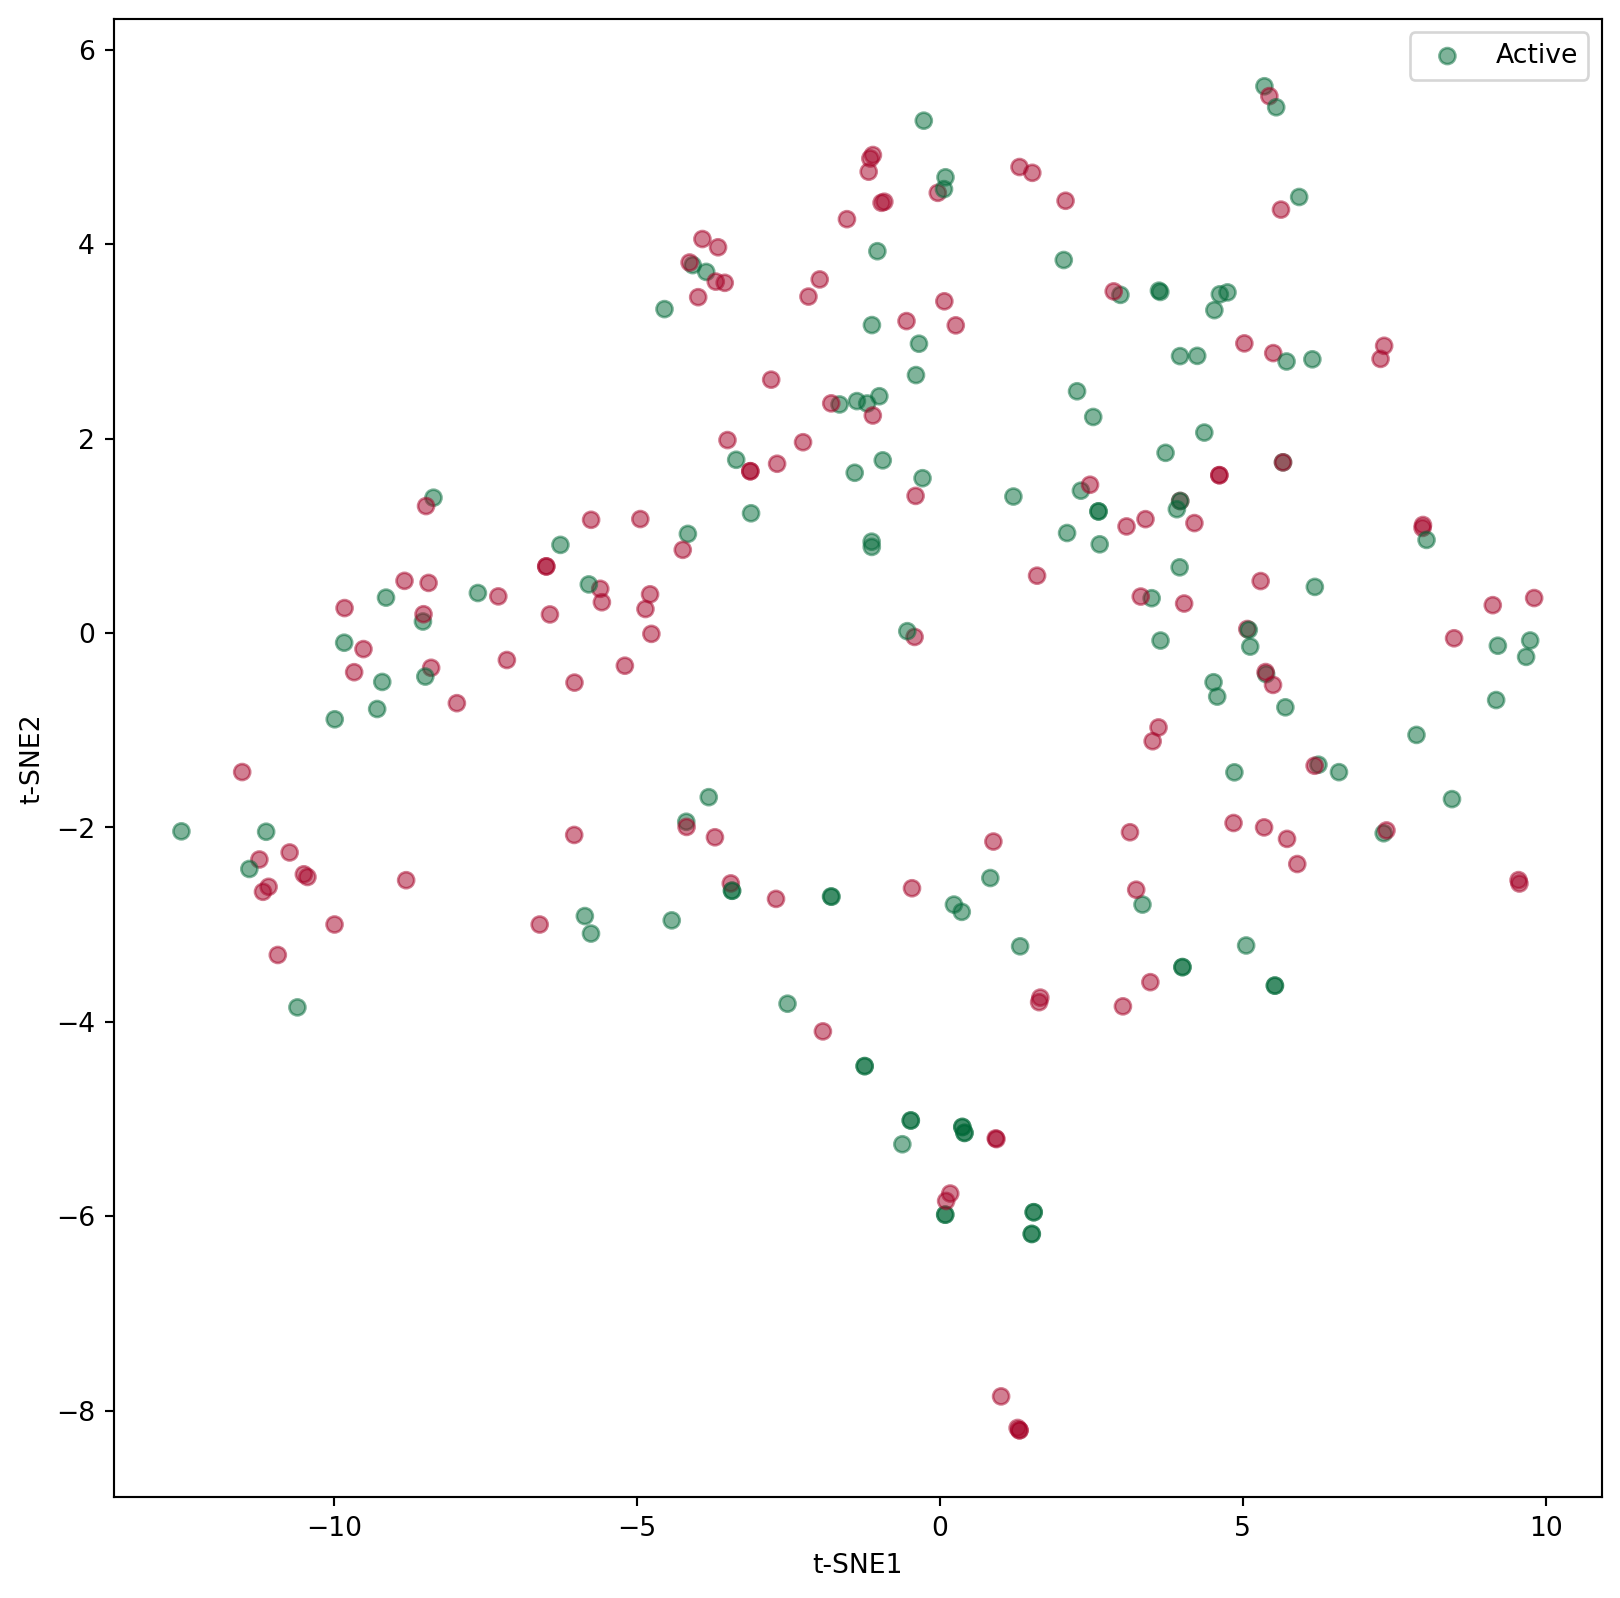

In [11]:
# REPRESENTATION OF 2D t-SNE
plt.figure(figsize=(10, 10))
plt.scatter(
    molecular_descriptors_tsne[0],
    molecular_descriptors_tsne[1],
    c=molecular_descriptors["activity"],
    cmap="RdYlGn",
    alpha=0.5,
)
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.legend(["Active", "Inactive"])
plt.savefig(figure_path + "tsne2D.png")
plt.show()

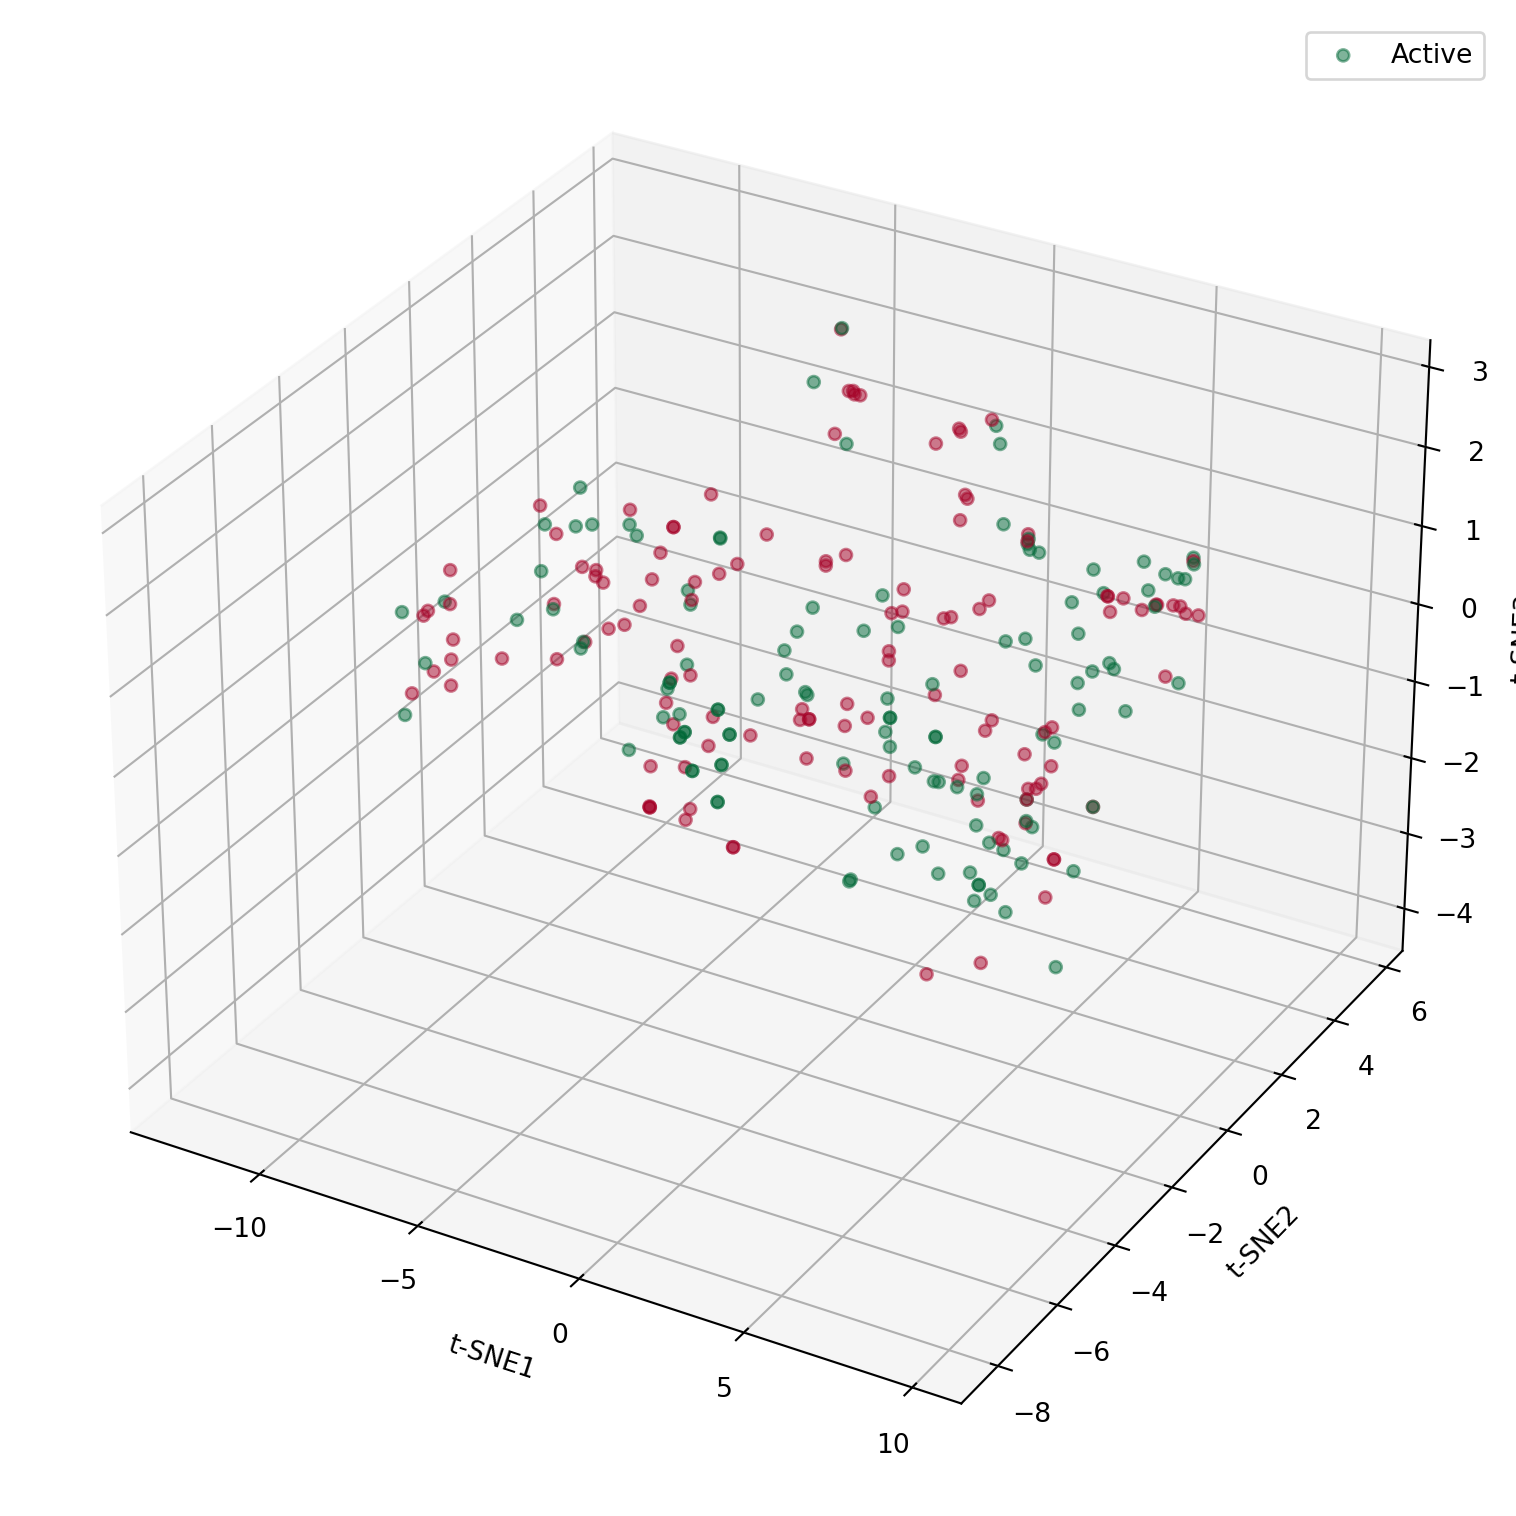

In [12]:
# REPRESENTATION OF 3D t-SNE
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    molecular_descriptors_tsne[0],
    molecular_descriptors_tsne[1],
    molecular_descriptors_tsne[2],
    c=molecular_descriptors["activity"],
    cmap="RdYlGn",
    alpha=0.5,
)
ax.set_xlabel("t-SNE1")
ax.set_ylabel("t-SNE2")
ax.set_zlabel("t-SNE3")
plt.legend(["Active", "Inactive"])
plt.savefig(figure_path + "tsne3D.png")
plt.show()